In [142]:
# https://biblio.wiki/wiki/Casino_Royale
import nltk
from nltk.corpus import stopwords
import math
%matplotlib inline

raw1 = open('casino_royale.txt').read()

In [143]:
raw1

'The scent and smoke and sweat of a casino are nauseating at three in the morning. Then the soul-erosion produced by high gambling – a compost of greed and fear and nervous tension – becomes unbearable and the senses awake and revolt from it.\n\nJames Bond suddenly knew that he was tired. He always knew when his body or his mind had had enough and he always acted on the knowledge. This helped him to avoid staleness and the sensual bluntness that breeds mistakes.\n\nHe shifted himself unobtrusively away from the roulette he had been playing and went to stand for a moment at the brass rail which surrounded breast-high the top table in the ‘salle privée’.\n\nLe Chiffre was still playing and still, apparently, winning. There was an untidy pile of flecked hundred-mille plaques in front of him. In the shadow of his thick left arm there nestled a discreet stack of the big yellow ones worth half a million francs each.\n\nBond watched the curious, impressive profile for a time, and then he shru

In [144]:
tokens1 = nltk.word_tokenize(raw1)
sentence1 = nltk.sent_tokenize(raw1)

In [145]:
#The number of token
len(tokens1)

58390

In [5]:
len(sentence1)

3189

In [6]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer() #to make base form

tokens_low = [w.lower() for w in tokens1]

#The number of sort of words
len(set(tokens_low))

#複数形や過去形を別の単語としてカウントしてしまっているため，実際の異なり語数はさらに少ない

6351

In [7]:
print (len(set(tokens_low))/len(tokens1))

0.10876862476451447


In [8]:
list1 = [tokens1]

text = []
for i in list1:
    text.append(nltk.Text(i))
    
text

[<Text: The scent and smoke and sweat of a...>]

In [9]:
freq_list = []
for i in text:
    freq_list.append(nltk.FreqDist(w.lower() for w in i))

stopwords = nltk.corpus.stopwords.words('english')
symbols = ["'", '"', '`', '.', ',', '-', '!', '?', ':', ';', '(', ')', '...', "'s", '’', '”', '“','–','—', '…', '*' ,'``', "''",'--','mr.',"n't", 'dr.','sir', '‘', 'mr', 'm.' ]

In [10]:
freq_list

[FreqDist({'the': 3355,
           'scent': 3,
           'and': 1809,
           'smoke': 10,
           'sweat': 10,
           'of': 1351,
           'a': 1304,
           'casino': 43,
           'are': 85,
           'nauseating': 1,
           'at': 370,
           'three': 39,
           'in': 693,
           'morning': 19,
           '.': 3135,
           'then': 196,
           'soul-erosion': 1,
           'produced': 2,
           'by': 159,
           'high': 20,
           'gambling': 9,
           '–': 69,
           'compost': 1,
           'greed': 2,
           'fear': 8,
           'nervous': 4,
           'tension': 3,
           'becomes': 2,
           'unbearable': 1,
           'senses': 4,
           'awake': 4,
           'revolt': 1,
           'from': 203,
           'it': 576,
           'james': 12,
           'bond': 573,
           'suddenly': 37,
           'knew': 51,
           'that': 429,
           'he': 1278,
           'was': 755,
           'tire

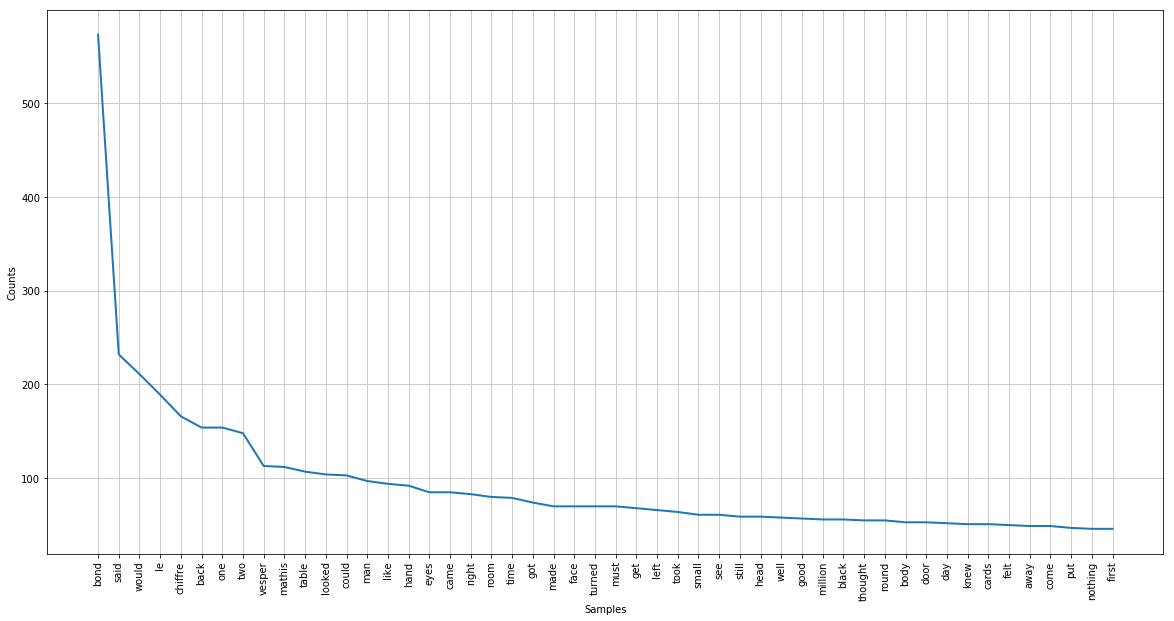

In [11]:
#Eliminate stopwords and symbols

import matplotlib.pyplot as plt
%matplotlib inline

freq_list_new = []
for i in text:
    freq_list_new.append(nltk.FreqDist(w.lower() for w in i if w.lower() not in stopwords + symbols))

for i in freq_list_new:
    plt.figure(figsize=(20,10))
    i.plot(50)

In [13]:
#順位チェック
sorted(freq_list_new[0].items(), key=lambda x: x[1], reverse=True)

[('bond', 573),
 ('said', 232),
 ('would', 211),
 ('le', 189),
 ('chiffre', 166),
 ('back', 154),
 ('one', 154),
 ('two', 148),
 ('vesper', 113),
 ('mathis', 112),
 ('table', 107),
 ('looked', 104),
 ('could', 103),
 ('man', 97),
 ('like', 94),
 ('hand', 92),
 ('eyes', 85),
 ('came', 85),
 ('right', 83),
 ('room', 80),
 ('time', 79),
 ('got', 74),
 ('made', 70),
 ('face', 70),
 ('turned', 70),
 ('must', 70),
 ('get', 68),
 ('left', 66),
 ('took', 64),
 ('small', 61),
 ('see', 61),
 ('still', 59),
 ('head', 59),
 ('well', 58),
 ('good', 57),
 ('million', 56),
 ('black', 56),
 ('thought', 55),
 ('round', 55),
 ('body', 53),
 ('door', 53),
 ('day', 52),
 ('knew', 51),
 ('cards', 51),
 ('felt', 50),
 ('away', 49),
 ('come', 49),
 ('put', 47),
 ('nothing', 46),
 ('first', 46),
 ('car', 46),
 ('chair', 46),
 ('seemed', 45),
 ('mind', 44),
 ('casino', 43),
 ('walked', 43),
 ('across', 43),
 ('number', 43),
 ('game', 42),
 ('gave', 42),
 ('towards', 42),
 ('go', 42),
 ('leiter', 42),
 ('went',

In [15]:
#Turn all words to basic form
basic_form = [ps.stem(word) for word in tokens_low if not word in stopwords + symbols]

In [16]:
#Textを使うためにreviewをlistにぶち込む
basic_form = [basic_form]

In [20]:
#原型に戻した単語で、再び文を再構築する。
text = []
for i in basic_form:
    text.append(nltk.Text(i))
    
text

[<Text: scent smoke sweat casino nauseat three morn soul-eros...>]

In [21]:
#Textからwords listを作る。
for i in text:
    words = [word for word in i]
    
words

['scent',
 'smoke',
 'sweat',
 'casino',
 'nauseat',
 'three',
 'morn',
 'soul-eros',
 'produc',
 'high',
 'gambl',
 'compost',
 'greed',
 'fear',
 'nervou',
 'tension',
 'becom',
 'unbear',
 'sens',
 'awak',
 'revolt',
 'jame',
 'bond',
 'suddenli',
 'knew',
 'tire',
 'alway',
 'knew',
 'bodi',
 'mind',
 'enough',
 'alway',
 'act',
 'knowledg',
 'help',
 'avoid',
 'stale',
 'sensual',
 'blunt',
 'breed',
 'mistak',
 'shift',
 'unobtrus',
 'away',
 'roulett',
 'play',
 'went',
 'stand',
 'moment',
 'brass',
 'rail',
 'surround',
 'breast-high',
 'top',
 'tabl',
 'sall',
 'privé',
 'le',
 'chiffr',
 'still',
 'play',
 'still',
 'appar',
 'win',
 'untidi',
 'pile',
 'fleck',
 'hundred-mil',
 'plaqu',
 'front',
 'shadow',
 'thick',
 'left',
 'arm',
 'nestl',
 'discreet',
 'stack',
 'big',
 'yellow',
 'one',
 'worth',
 'half',
 'million',
 'franc',
 'bond',
 'watch',
 'curiou',
 'impress',
 'profil',
 'time',
 'shrug',
 'shoulder',
 'lighten',
 'thought',
 'move',
 'away',
 'barrier',
 'su

In [22]:
#文章を小文字化
sentence_small = [w.lower() for w in sentence1]
sentence_small

['the scent and smoke and sweat of a casino are nauseating at three in the morning.',
 'then the soul-erosion produced by high gambling – a compost of greed and fear and nervous tension – becomes unbearable and the senses awake and revolt from it.',
 'james bond suddenly knew that he was tired.',
 'he always knew when his body or his mind had had enough and he always acted on the knowledge.',
 'this helped him to avoid staleness and the sensual bluntness that breeds mistakes.',
 'he shifted himself unobtrusively away from the roulette he had been playing and went to stand for a moment at the brass rail which surrounded breast-high the top table in the ‘salle privée’.',
 'le chiffre was still playing and still, apparently, winning.',
 'there was an untidy pile of flecked hundred-mille plaques in front of him.',
 'in the shadow of his thick left arm there nestled a discreet stack of the big yellow ones worth half a million francs each.',
 'bond watched the curious, impressive profile for

In [33]:
#いけそう。文ごとに取り出し、それぞれの単語を原型に戻す。それを再び再構築する！
for sentence in sentence_small:
    form = [ps.stem(word)  for word in sentence.split() if not word in stopwords + symbols]
    print (form)

['scent', 'smoke', 'sweat', 'casino', 'nauseat', 'three', 'morning.']
['soul-eros', 'produc', 'high', 'gambl', 'compost', 'greed', 'fear', 'nervou', 'tension', 'becom', 'unbear', 'sens', 'awak', 'revolt', 'it.']
['jame', 'bond', 'suddenli', 'knew', 'tired.']
['alway', 'knew', 'bodi', 'mind', 'enough', 'alway', 'act', 'knowledge.']
['help', 'avoid', 'stale', 'sensual', 'blunt', 'breed', 'mistakes.']
['shift', 'unobtrus', 'away', 'roulett', 'play', 'went', 'stand', 'moment', 'brass', 'rail', 'surround', 'breast-high', 'top', 'tabl', '‘sall', 'privée’.']
['le', 'chiffr', 'still', 'play', 'still,', 'apparently,', 'winning.']
['untidi', 'pile', 'fleck', 'hundred-mil', 'plaqu', 'front', 'him.']
['shadow', 'thick', 'left', 'arm', 'nestl', 'discreet', 'stack', 'big', 'yellow', 'one', 'worth', 'half', 'million', 'franc', 'each.']
['bond', 'watch', 'curious,', 'impress', 'profil', 'time,', 'shrug', 'shoulder', 'lighten', 'thought', 'move', 'away.']
['barrier', 'surround', '‘caisse’', 'come', 'hi

In [34]:
#上の本番
form_sent = []
for sentence in sentence_small:
    form = [ps.stem(word)  for word in sentence.split() if not word in stopwords + symbols]
    form_sent.append(" ".join(form))

In [35]:
#ピリオドやカンマを消しまーす。Delte period and comma...めんどい...
form_sent2 = []

for i in form_sent:
    tokens = nltk.word_tokenize(i)
    form = [word for word in tokens if not word in stopwords + symbols]
    form_sent2.append(" ".join(form))
    

In [36]:
#次にこの新しく、原型に戻し、stopwordを取り除いた単語数をグラフ化したい
text = []

for i in form_sent2:
    tokens = nltk.word_tokenize(i)
    for j in tokens:
        text.append(j)

In [37]:
text = [text]

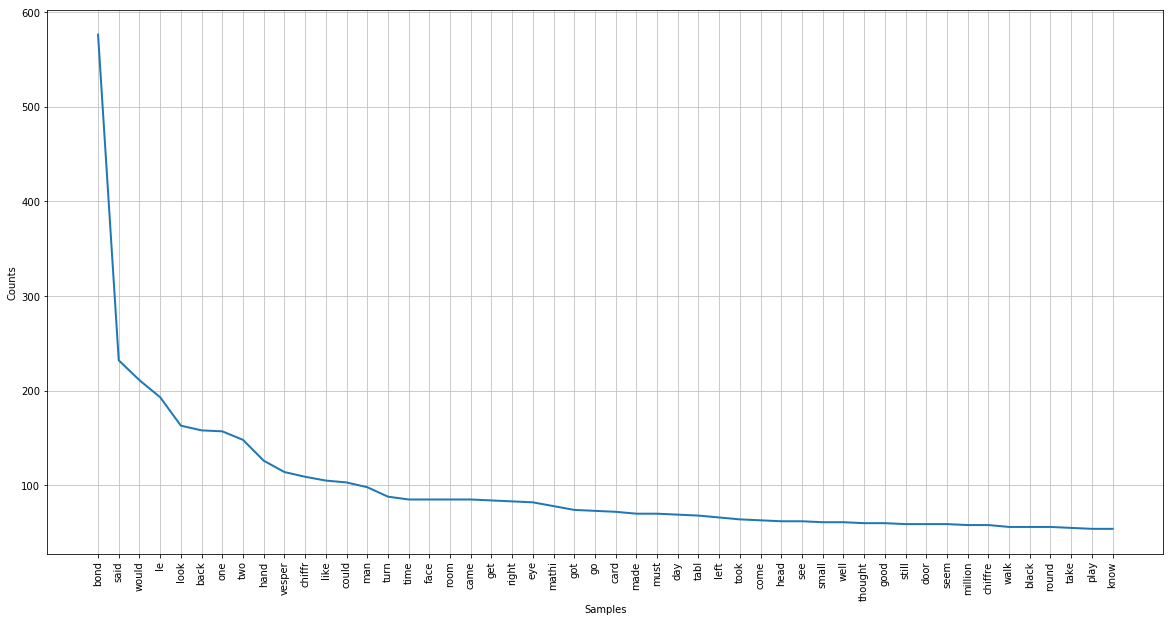

In [38]:
#新しく、原型に戻し、stopwordを取り除いた単語数をグラフ化

import matplotlib.pyplot as plt
%matplotlib inline

f_list_new = []
for i in text:
    f_list_new.append(nltk.FreqDist(w.lower() for w in i if w.lower() not in stopwords + symbols))

for i in f_list_new:
    plt.figure(figsize=(20,10))
    i.plot(50)

In [39]:
#順位チェック
sorted(f_list_new[0].items(), key=lambda x: x[1], reverse=True)

[('bond', 576),
 ('said', 232),
 ('would', 211),
 ('le', 193),
 ('look', 163),
 ('back', 158),
 ('one', 157),
 ('two', 148),
 ('hand', 126),
 ('vesper', 114),
 ('chiffr', 109),
 ('like', 105),
 ('could', 103),
 ('man', 98),
 ('turn', 88),
 ('time', 85),
 ('face', 85),
 ('room', 85),
 ('came', 85),
 ('get', 84),
 ('right', 83),
 ('eye', 82),
 ('mathi', 78),
 ('got', 74),
 ('go', 73),
 ('card', 72),
 ('made', 70),
 ('must', 70),
 ('day', 69),
 ('tabl', 68),
 ('left', 66),
 ('took', 64),
 ('come', 63),
 ('head', 62),
 ('see', 62),
 ('small', 61),
 ('well', 61),
 ('thought', 60),
 ('good', 60),
 ('still', 59),
 ('door', 59),
 ('seem', 59),
 ('million', 58),
 ('chiffre', 58),
 ('walk', 56),
 ('black', 56),
 ('round', 56),
 ('take', 55),
 ('play', 54),
 ('know', 54),
 ('knew', 51),
 ('felt', 50),
 ('car', 50),
 ('away', 49),
 ('even', 49),
 ('ask', 49),
 ('number', 49),
 ('put', 48),
 ('think', 48),
 ('chair', 48),
 ('table', 47),
 ('de', 46),
 ('first', 46),
 ('v', 46),
 ('mind', 45),
 ('ar

In [40]:
# let's make new list only with words whose frequency  > 5

moreThan8_freq = []

for i,j in f_list_new[0].items():
    if j > 8:
        moreThan8_freq.append(i)

In [41]:
# 頻出単語top2のgameshとsaidが同時に現れる文を、ピックアップしカウントするプログラムを全ての単語に割り当てる試み。

count_s = {}

for wn1 in range(0, len(moreThan8_freq)-1):
    for wn2 in range(wn1+1, len(moreThan8_freq)):
        s = 0
    
        for sent in form_sent2:
            index1 = 0
            index2 = 0
            
            #remove duplicate
            if moreThan8_freq[wn1] != moreThan8_freq[wn2]:
                
                if moreThan8_freq[wn1] in sent.split():
                    index1 += 1
                if moreThan8_freq[wn2] in sent.split():
                    index2 += 1
              
                if index1 > 0 and index2 > 0:
                    s += 1
                
        count_s.update({( moreThan8_freq[wn1], moreThan8_freq[wn2]) :s })
        

In [42]:
count_s

{('smoke', 'sweat'): 1,
 ('smoke', 'casino'): 1,
 ('smoke', 'three'): 1,
 ('smoke', 'morning'): 1,
 ('smoke', 'high'): 0,
 ('smoke', 'fear'): 0,
 ('smoke', 'sens'): 0,
 ('smoke', 'bond'): 6,
 ('smoke', 'suddenli'): 0,
 ('smoke', 'knew'): 0,
 ('smoke', 'alway'): 0,
 ('smoke', 'bodi'): 0,
 ('smoke', 'mind'): 0,
 ('smoke', 'enough'): 0,
 ('smoke', 'help'): 0,
 ('smoke', 'away'): 0,
 ('smoke', 'roulett'): 0,
 ('smoke', 'play'): 0,
 ('smoke', 'went'): 0,
 ('smoke', 'stand'): 0,
 ('smoke', 'moment'): 0,
 ('smoke', 'rail'): 0,
 ('smoke', 'top'): 0,
 ('smoke', 'tabl'): 0,
 ('smoke', 'le'): 0,
 ('smoke', 'chiffr'): 0,
 ('smoke', 'still'): 1,
 ('smoke', 'plaqu'): 0,
 ('smoke', 'front'): 0,
 ('smoke', 'shadow'): 0,
 ('smoke', 'thick'): 0,
 ('smoke', 'left'): 0,
 ('smoke', 'arm'): 0,
 ('smoke', 'big'): 0,
 ('smoke', 'one'): 3,
 ('smoke', 'half'): 0,
 ('smoke', 'million'): 0,
 ('smoke', 'franc'): 0,
 ('smoke', 'watch'): 1,
 ('smoke', 'time'): 0,
 ('smoke', 'shrug'): 0,
 ('smoke', 'shoulder'): 0,
 (

In [43]:
#順位チェック
sorted(count_s.items(), key=lambda x: x[1], reverse=True)

[(('le', 'chiffr'), 109),
 (('le', 'chiffre'), 56),
 (('bond', 'said'), 52),
 (('bond', 'look'), 47),
 (('bond', 'back'), 38),
 (('bond', 'would'), 36),
 (('bond', 'le'), 33),
 (('bond', 'eye'), 29),
 (('bond', 'one'), 27),
 (('bond', 'two'), 25),
 (('bond', 'turn'), 25),
 (('man', 'thin'), 25),
 (('bond', 'hand'), 24),
 (('bond', 'vesper'), 24),
 (('one', 'two'), 24),
 (('said', 'vesper'), 24),
 (('le', 'two'), 23),
 (('hand', 'right'), 23),
 (('bond', 'man'), 22),
 (('bond', 'room'), 22),
 (('two', 'card'), 22),
 (('bond', 'face'), 21),
 (('bond', 'left'), 20),
 (('bond', 'thought'), 20),
 (('bond', 'chiffr'), 19),
 (('million', 'franc'), 19),
 (('v', 'got'), 19),
 (('bond', 'tabl'), 18),
 (('bond', 'table'), 18),
 (('le', 'would'), 18),
 (('look', 'vesper'), 18),
 (('bond', 'time'), 17),
 (('bond', 'head'), 17),
 (('bond', 'came'), 17),
 (('bond', 'mathi'), 17),
 (('bond', 'chair'), 17),
 (('eye', 'look'), 17),
 (('bond', 'knew'), 16),
 (('bond', 'could'), 16),
 (('bond', 'took'), 1

In [44]:
#namely

new = {tuple(sorted(x)):y for x, y in count_s.items()}

In [45]:
#順位チェック again !
new2 = dict(sorted(new.items(), key=lambda x: x[1], reverse=True))
new2

{('chiffr', 'le'): 109,
 ('chiffre', 'le'): 56,
 ('bond', 'said'): 52,
 ('bond', 'look'): 47,
 ('back', 'bond'): 38,
 ('bond', 'would'): 36,
 ('bond', 'le'): 33,
 ('bond', 'eye'): 29,
 ('bond', 'one'): 27,
 ('bond', 'two'): 25,
 ('bond', 'turn'): 25,
 ('man', 'thin'): 25,
 ('bond', 'hand'): 24,
 ('bond', 'vesper'): 24,
 ('one', 'two'): 24,
 ('said', 'vesper'): 24,
 ('le', 'two'): 23,
 ('hand', 'right'): 23,
 ('bond', 'man'): 22,
 ('bond', 'room'): 22,
 ('card', 'two'): 22,
 ('bond', 'face'): 21,
 ('bond', 'left'): 20,
 ('bond', 'thought'): 20,
 ('bond', 'chiffr'): 19,
 ('franc', 'million'): 19,
 ('got', 'v'): 19,
 ('bond', 'tabl'): 18,
 ('bond', 'table'): 18,
 ('le', 'would'): 18,
 ('look', 'vesper'): 18,
 ('bond', 'time'): 17,
 ('bond', 'head'): 17,
 ('bond', 'came'): 17,
 ('bond', 'mathi'): 17,
 ('bond', 'chair'): 17,
 ('eye', 'look'): 17,
 ('bond', 'knew'): 16,
 ('bond', 'could'): 16,
 ('bond', 'took'): 16,
 ('bond', 'right'): 16,
 ('bond', 'must'): 16,
 ('bond', 'card'): 16,
 ('lik

In [46]:
new3 = dict((k, v) for k, v in new2.items() if v >= 2)
new3

{('chiffr', 'le'): 109,
 ('chiffre', 'le'): 56,
 ('bond', 'said'): 52,
 ('bond', 'look'): 47,
 ('back', 'bond'): 38,
 ('bond', 'would'): 36,
 ('bond', 'le'): 33,
 ('bond', 'eye'): 29,
 ('bond', 'one'): 27,
 ('bond', 'two'): 25,
 ('bond', 'turn'): 25,
 ('man', 'thin'): 25,
 ('bond', 'hand'): 24,
 ('bond', 'vesper'): 24,
 ('one', 'two'): 24,
 ('said', 'vesper'): 24,
 ('le', 'two'): 23,
 ('hand', 'right'): 23,
 ('bond', 'man'): 22,
 ('bond', 'room'): 22,
 ('card', 'two'): 22,
 ('bond', 'face'): 21,
 ('bond', 'left'): 20,
 ('bond', 'thought'): 20,
 ('bond', 'chiffr'): 19,
 ('franc', 'million'): 19,
 ('got', 'v'): 19,
 ('bond', 'tabl'): 18,
 ('bond', 'table'): 18,
 ('le', 'would'): 18,
 ('look', 'vesper'): 18,
 ('bond', 'time'): 17,
 ('bond', 'head'): 17,
 ('bond', 'came'): 17,
 ('bond', 'mathi'): 17,
 ('bond', 'chair'): 17,
 ('eye', 'look'): 17,
 ('bond', 'knew'): 16,
 ('bond', 'could'): 16,
 ('bond', 'took'): 16,
 ('bond', 'right'): 16,
 ('bond', 'must'): 16,
 ('bond', 'card'): 16,
 ('lik

In [47]:
#順位チェック again !
new4 = dict(sorted(new3.items(), key=lambda x: x[1], reverse=True))
new4

{('chiffr', 'le'): 109,
 ('chiffre', 'le'): 56,
 ('bond', 'said'): 52,
 ('bond', 'look'): 47,
 ('back', 'bond'): 38,
 ('bond', 'would'): 36,
 ('bond', 'le'): 33,
 ('bond', 'eye'): 29,
 ('bond', 'one'): 27,
 ('bond', 'two'): 25,
 ('bond', 'turn'): 25,
 ('man', 'thin'): 25,
 ('bond', 'hand'): 24,
 ('bond', 'vesper'): 24,
 ('one', 'two'): 24,
 ('said', 'vesper'): 24,
 ('le', 'two'): 23,
 ('hand', 'right'): 23,
 ('bond', 'man'): 22,
 ('bond', 'room'): 22,
 ('card', 'two'): 22,
 ('bond', 'face'): 21,
 ('bond', 'left'): 20,
 ('bond', 'thought'): 20,
 ('bond', 'chiffr'): 19,
 ('franc', 'million'): 19,
 ('got', 'v'): 19,
 ('bond', 'tabl'): 18,
 ('bond', 'table'): 18,
 ('le', 'would'): 18,
 ('look', 'vesper'): 18,
 ('bond', 'time'): 17,
 ('bond', 'head'): 17,
 ('bond', 'came'): 17,
 ('bond', 'mathi'): 17,
 ('bond', 'chair'): 17,
 ('eye', 'look'): 17,
 ('bond', 'knew'): 16,
 ('bond', 'could'): 16,
 ('bond', 'took'): 16,
 ('bond', 'right'): 16,
 ('bond', 'must'): 16,
 ('bond', 'card'): 16,
 ('lik

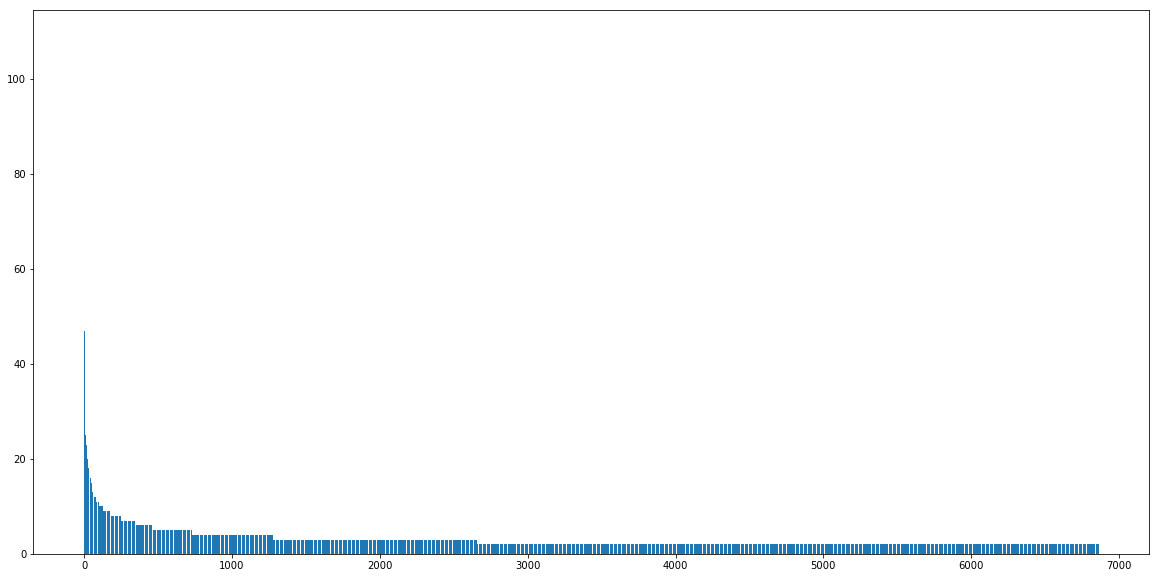

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.bar(range(len(new4)), new4.values(), align='center')
# plt.xticks(range(len(new2)), new2.keys())  too many....
#plt.xticks(range(len(new4)), new4.keys())  


# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x

plt.show()

In [49]:
#単語順位チェック
word_f = sorted(f_list_new[0].items(), key=lambda x: x[1], reverse=True)
word_f

[('bond', 576),
 ('said', 232),
 ('would', 211),
 ('le', 193),
 ('look', 163),
 ('back', 158),
 ('one', 157),
 ('two', 148),
 ('hand', 126),
 ('vesper', 114),
 ('chiffr', 109),
 ('like', 105),
 ('could', 103),
 ('man', 98),
 ('turn', 88),
 ('time', 85),
 ('face', 85),
 ('room', 85),
 ('came', 85),
 ('get', 84),
 ('right', 83),
 ('eye', 82),
 ('mathi', 78),
 ('got', 74),
 ('go', 73),
 ('card', 72),
 ('made', 70),
 ('must', 70),
 ('day', 69),
 ('tabl', 68),
 ('left', 66),
 ('took', 64),
 ('come', 63),
 ('head', 62),
 ('see', 62),
 ('small', 61),
 ('well', 61),
 ('thought', 60),
 ('good', 60),
 ('still', 59),
 ('door', 59),
 ('seem', 59),
 ('million', 58),
 ('chiffre', 58),
 ('walk', 56),
 ('black', 56),
 ('round', 56),
 ('take', 55),
 ('play', 54),
 ('know', 54),
 ('knew', 51),
 ('felt', 50),
 ('car', 50),
 ('away', 49),
 ('even', 49),
 ('ask', 49),
 ('number', 49),
 ('put', 48),
 ('think', 48),
 ('chair', 48),
 ('table', 47),
 ('de', 46),
 ('first', 46),
 ('v', 46),
 ('mind', 45),
 ('ar

In [50]:
word_fdic = dict(word_f)
word_fdic

{'bond': 576,
 'said': 232,
 'would': 211,
 'le': 193,
 'look': 163,
 'back': 158,
 'one': 157,
 'two': 148,
 'hand': 126,
 'vesper': 114,
 'chiffr': 109,
 'like': 105,
 'could': 103,
 'man': 98,
 'turn': 88,
 'time': 85,
 'face': 85,
 'room': 85,
 'came': 85,
 'get': 84,
 'right': 83,
 'eye': 82,
 'mathi': 78,
 'got': 74,
 'go': 73,
 'card': 72,
 'made': 70,
 'must': 70,
 'day': 69,
 'tabl': 68,
 'left': 66,
 'took': 64,
 'come': 63,
 'head': 62,
 'see': 62,
 'small': 61,
 'well': 61,
 'thought': 60,
 'good': 60,
 'still': 59,
 'door': 59,
 'seem': 59,
 'million': 58,
 'chiffre': 58,
 'walk': 56,
 'black': 56,
 'round': 56,
 'take': 55,
 'play': 54,
 'know': 54,
 'knew': 51,
 'felt': 50,
 'car': 50,
 'away': 49,
 'even': 49,
 'ask': 49,
 'number': 49,
 'put': 48,
 'think': 48,
 'chair': 48,
 'table': 47,
 'de': 46,
 'first': 46,
 'v': 46,
 'mind': 45,
 'arm': 45,
 'want': 45,
 'casino': 44,
 'game': 44,
 'smile': 44,
 'long': 44,
 'across': 43,
 'open': 43,
 'leiter': 43,
 'bodi': 42,

In [51]:
new2

{('chiffr', 'le'): 109,
 ('chiffre', 'le'): 56,
 ('bond', 'said'): 52,
 ('bond', 'look'): 47,
 ('back', 'bond'): 38,
 ('bond', 'would'): 36,
 ('bond', 'le'): 33,
 ('bond', 'eye'): 29,
 ('bond', 'one'): 27,
 ('bond', 'two'): 25,
 ('bond', 'turn'): 25,
 ('man', 'thin'): 25,
 ('bond', 'hand'): 24,
 ('bond', 'vesper'): 24,
 ('one', 'two'): 24,
 ('said', 'vesper'): 24,
 ('le', 'two'): 23,
 ('hand', 'right'): 23,
 ('bond', 'man'): 22,
 ('bond', 'room'): 22,
 ('card', 'two'): 22,
 ('bond', 'face'): 21,
 ('bond', 'left'): 20,
 ('bond', 'thought'): 20,
 ('bond', 'chiffr'): 19,
 ('franc', 'million'): 19,
 ('got', 'v'): 19,
 ('bond', 'tabl'): 18,
 ('bond', 'table'): 18,
 ('le', 'would'): 18,
 ('look', 'vesper'): 18,
 ('bond', 'time'): 17,
 ('bond', 'head'): 17,
 ('bond', 'came'): 17,
 ('bond', 'mathi'): 17,
 ('bond', 'chair'): 17,
 ('eye', 'look'): 17,
 ('bond', 'knew'): 16,
 ('bond', 'could'): 16,
 ('bond', 'took'): 16,
 ('bond', 'right'): 16,
 ('bond', 'must'): 16,
 ('bond', 'card'): 16,
 ('lik

In [52]:
count = 0
list1 = []

for i, j in new2.items():
    #print (i)
    
    p = j / (word_fdic[i[0]]  * word_fdic[i[1]])
    list1.append(p)
    
    count += 1
    
    if count == 1000:
        break

In [53]:
count = 0
p_values = []

for i, j in new2.items():
    #print (i)
    
    s = j / (word_fdic[i[0]]  * word_fdic[i[1]])
    p = (word_fdic[i[0]]  * word_fdic[i[1]]) * s * s
    p_values.append(p)
    
    count += 1
    
    if count == 1000:
        break

In [54]:
p_values

[0.5647668393782384,
 0.2801500804002144,
 0.020234674329501913,
 0.023528033401499664,
 0.01586673699015471,
 0.01066350710900474,
 0.00979598445595855,
 0.01780572493224932,
 0.008061305732484076,
 0.0073315503003003,
 0.012330334595959596,
 0.17236624379481522,
 0.007936507936507936,
 0.008771929824561403,
 0.0247891203305216,
 0.021778584392014518,
 0.018519815151939505,
 0.05058328552304456,
 0.008574263038548753,
 0.00988562091503268,
 0.04542042042042042,
 0.00900735294117647,
 0.010521885521885523,
 0.011574074074074073,
 0.0057498725790010195,
 0.18861024033437826,
 0.10605170387779084,
 0.008272058823529412,
 0.011968085106382979,
 0.007956191832625298,
 0.01743622860833064,
 0.005902777777777778,
 0.008092517921146953,
 0.005902777777777778,
 0.006432514245014244,
 0.010452835648148149,
 0.021622026036211283,
 0.008714596949891068,
 0.004314994606256741,
 0.006944444444444444,
 0.00535475234270415,
 0.006349206349206349,
 0.006172839506172839,
 0.011554953735048522,
 0.01177

In [56]:
max(p_values)

0.5647668393782384

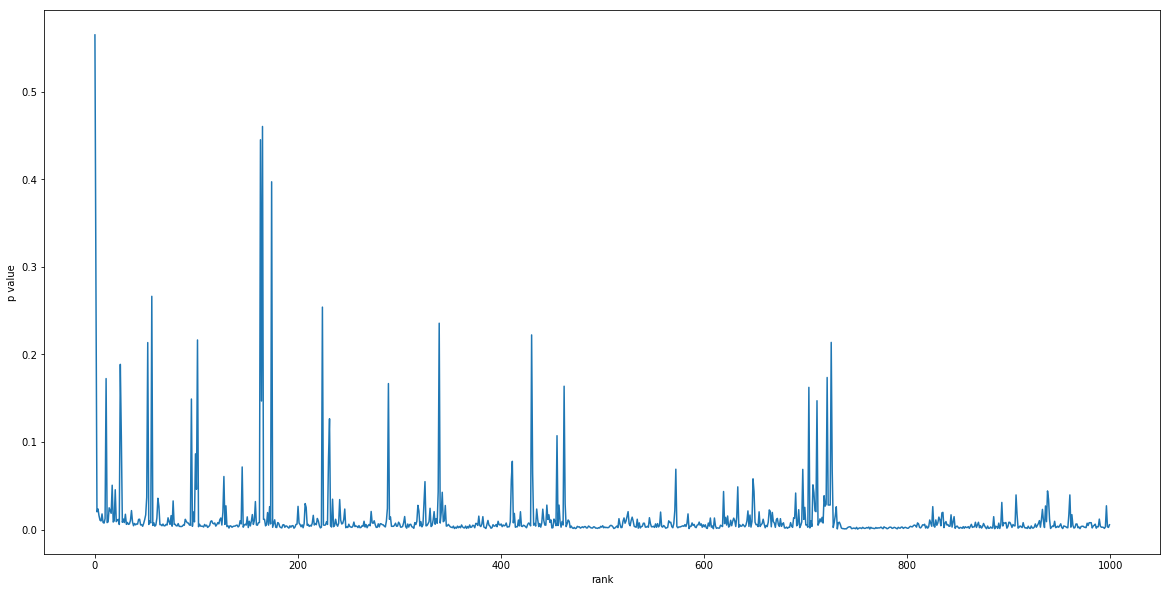

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(p_values)

plt.ylabel('p value')
plt.xlabel('rank')
plt.show()

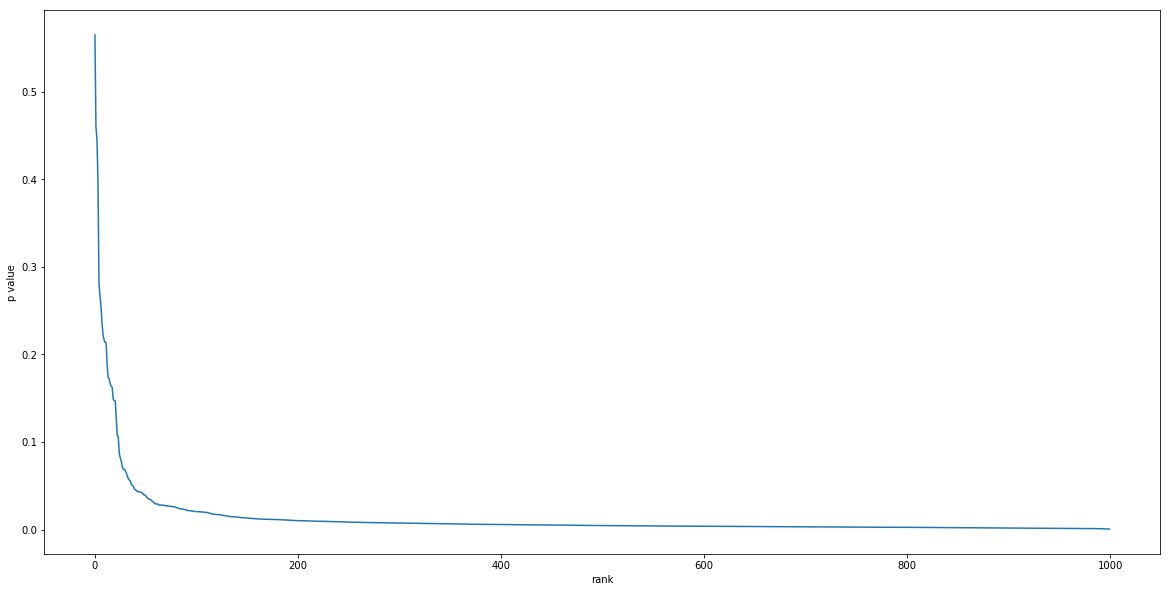

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(p_values, reverse=True))

plt.ylabel('p value')
plt.xlabel('rank')
plt.show()

In [57]:
list1

[0.0051813471502590676,
 0.005002680007146686,
 0.00038912835249042143,
 0.0005005964553510566,
 0.00041754571026722927,
 0.0002962085308056872,
 0.00029684801381692574,
 0.000613990514905149,
 0.0002985668789808917,
 0.000293262012012012,
 0.0004932133838383839,
 0.006894649751792609,
 0.00033068783068783067,
 0.0003654970760233918,
 0.0010328800137717334,
 0.0009074410163339383,
 0.0008052093544321523,
 0.002199273283610633,
 0.00038973922902494333,
 0.00044934640522875815,
 0.0020645645645645644,
 0.000428921568627451,
 0.0005260942760942761,
 0.0005787037037037037,
 0.000302624872579001,
 0.009926854754440962,
 0.005581668625146886,
 0.00045955882352941176,
 0.0006648936170212766,
 0.0004420106573680721,
 0.0009686793671294801,
 0.00034722222222222224,
 0.0004760304659498208,
 0.00034722222222222224,
 0.00037838319088319086,
 0.0006148726851851852,
 0.0012718838844830167,
 0.0005446623093681918,
 0.00026968716289104636,
 0.00043402777777777775,
 0.00033467202141900936,
 0.000396825

In [58]:
max(list1)

0.05113636363636364

In [59]:
count = 0
for i, j in new2.items():
    if count == 73:
        print(i,j)
    count += 1

('chiffr', 'two') 12


In [60]:
for i,j in word_fdic.items():
    if i == 'chiffr':
        print(i,j)
    elif i == 'two':
        print(i,j)

two 148
chiffr 109


In [61]:
def second_largest(numbers):
    count = 0
    m1 = m2 = float('-inf')
    for x in numbers:
        count += 1
        if x > m2:
            if x >= m1:
                m1, m2 = x, m1            
            else:
                m2 = x
    return m2 if count >= 2 else None

In [62]:
second_largest(list1)

0.04945054945054945

In [63]:
list1.index(second_largest(list1))

163

In [64]:
count = 0
for i, j in new2.items():
    if count == 70:
        print(i,j)
    count += 1

('across', 'bond') 12


In [65]:
for i,j in word_fdic.items():
    if i == 'across':
        print(i,j)
    elif i == 'bond':
        print(i,j)

bond 576
across 43


In [66]:
sorted(list1, reverse=True)[:6]

[0.05113636363636364,
 0.04945054945054945,
 0.04411764705882353,
 0.042735042735042736,
 0.037037037037037035,
 0.034722222222222224]

In [92]:
print(list1.index(0.05113636363636364))
print(list1.index(0.04945054945054945))
print(list1.index(0.04945054945054945))
print(list1.index(0.042735042735042736))
print(list1.index(0.037037037037037035))

165
163
163
725
430


In [93]:
count = 0
for i, j in new2.items():
    if count == 165:
        print(i,j)
    count += 1

('chef', 'parti') 9


In [94]:
for i,j in word_fdic.items():
    if i == 'chef':
        print(i,j)
    elif i == 'parti':
        print(i,j)

chef 16
parti 11


In [95]:
count = 0
for i, j in new2.items():
    if count == 163:
        print(i,j)
    count += 1

('lynd', 'miss') 9


In [96]:
for i,j in word_fdic.items():
    if i == 'lynd':
        print(i,j)
    elif i ==  'miss':
        print(i,j)

miss 14
lynd 13


In [97]:
count = 0
for i, j in new2.items():
    if count == 725:
        print(i,j)
    count += 1

('seven', 'six') 5


In [98]:
for i,j in word_fdic.items():
    if i == 'seven':
        print(i,j)
    elif i ==  'six':
        print(i,j)

six 13
seven 9


In [99]:
count = 0
for i, j in new2.items():
    if count == 430:
        print(i,j)
    count += 1

('hundr', 'yard') 6


In [100]:
for i,j in word_fdic.items():
    if i == 'hundr':
        print(i,j)
    elif i ==  'yard':
        print(i,j)

hundr 18
yard 9


# P value

In [108]:
(sorted(p_values, reverse=True))

[0.5647668393782384,
 0.46022727272727276,
 0.44505494505494503,
 0.3970588235294118,
 0.2801500804002144,
 0.266304347826087,
 0.25396825396825395,
 0.23557692307692307,
 0.2222222222222222,
 0.21645796064400716,
 0.2136752136752137,
 0.21347248576850095,
 0.18861024033437826,
 0.1736111111111111,
 0.17236624379481522,
 0.16666666666666666,
 0.16363636363636364,
 0.16233766233766228,
 0.14901477832512317,
 0.14705882352941177,
 0.1467391304347826,
 0.12648221343873514,
 0.10714285714285714,
 0.10605170387779084,
 0.08642857142857144,
 0.08184143222506395,
 0.07792207792207792,
 0.07142857142857142,
 0.06887052341597796,
 0.06868131868131869,
 0.06684491978609626,
 0.06428571428571428,
 0.06053268765133172,
 0.057870370370370364,
 0.05642633228840126,
 0.0546875,
 0.0510204081632653,
 0.05058328552304456,
 0.04873294346978557,
 0.04597264437689969,
 0.04542042042042042,
 0.0440771349862259,
 0.043402777777777776,
 0.043402777777777776,
 0.04298245614035088,
 0.042534722222222224,
 0.04

In [124]:
print(p_values.index((sorted(p_values, reverse=True))[0]))
print(p_values.index((sorted(p_values, reverse=True))[1]))
print(p_values.index((sorted(p_values, reverse=True))[2]))
print(p_values.index((sorted(p_values, reverse=True))[3]))
print(p_values.index((sorted(p_values, reverse=True))[4]))

0
165
163
174
1


In [129]:
count = 0
for i, j in new2.items():
    if count == 0:
        print(i,j)
    count += 1

('chiffr', 'le') 109


In [130]:
for i,j in word_fdic.items():
    if i == 'chiffr':
        print(i,j)
    elif i ==  'le':
        print(i,j)

le 193
chiffr 109


In [132]:
count = 0
for i, j in new2.items():
    if count == 165:
        print(i,j)
    count += 1

('chef', 'parti') 9


In [133]:
for i,j in word_fdic.items():
    if i == 'chef':
        print(i,j)
    elif i ==  'parti':
        print(i,j)

chef 16
parti 11


In [134]:
count = 0
for i, j in new2.items():
    if count == 163:
        print(i,j)
    count += 1

('lynd', 'miss') 9


In [135]:
for i,j in word_fdic.items():
    if i == 'lynd':
        print(i,j)
    elif i ==  'miss':
        print(i,j)

miss 14
lynd 13


In [136]:
count = 0
for i, j in new2.items():
    if count == 174:
        print(i,j)
    count += 1

('banco', 'un') 9


In [137]:
for i,j in word_fdic.items():
    if i == 'banco':
        print(i,j)
    elif i ==  'un':
        print(i,j)

banco 17
un 12


In [139]:
count = 0
for i, j in new2.items():
    if count == 1:
        print(i,j)
    count += 1

('chiffre', 'le') 56


In [141]:
for i,j in word_fdic.items():
    if i == 'chiffre':
        print(i,j)
    elif i ==  'le':
        print(i,j)

le 193
chiffre 58


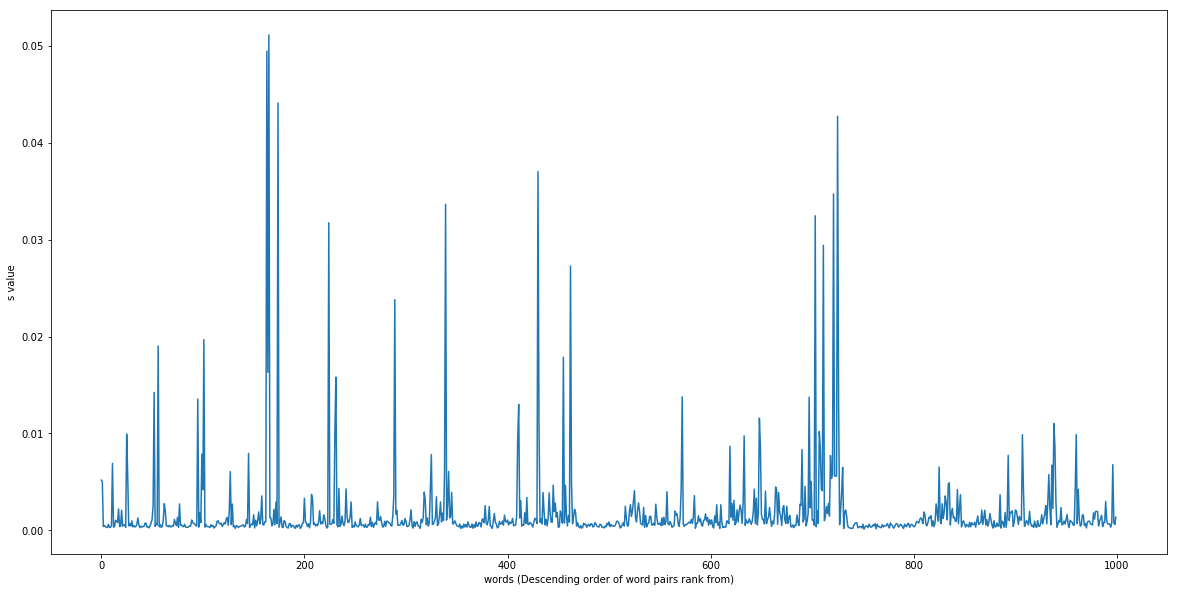

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(list1)

plt.ylabel('s value')
plt.xlabel('words (Descending order of word pairs rank from)')
plt.show()

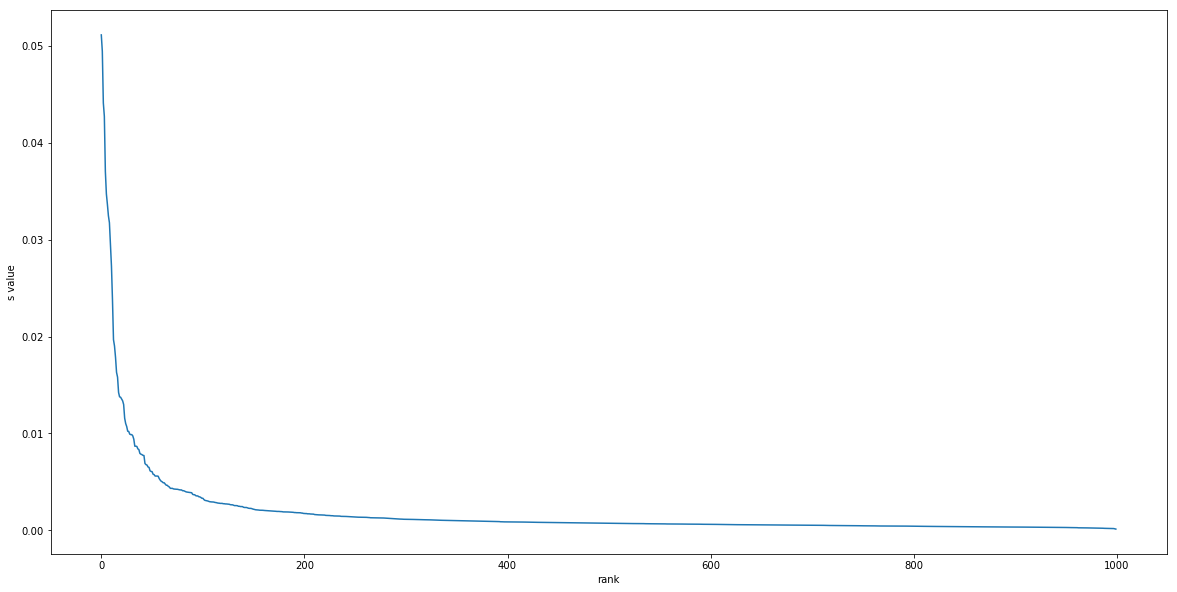

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(list1, reverse=True))

plt.ylabel('s value')
plt.xlabel('rank')
plt.show()

In [69]:
from math import log
log_list = [log(y,10) for y in list1]
log_list

[-2.2855573090077734,
 -2.3007972755645105,
 -3.4099071246793122,
 -3.300512229891452,
 -3.379295973760824,
 -3.5284024379536167,
 -3.5274658525530977,
 -3.2118383379079725,
 -3.5249583716734585,
 -3.532744190146132,
 -3.3069651469013426,
 -2.1614877910874517,
 -3.480581786829169,
 -3.437116093048078,
 -2.985950126092585,
 -3.042181594515766,
 -3.094091188385138,
 -2.6577208014760436,
 -3.4092258782935003,
 -3.3474187283152985,
 -2.6851715310040194,
 -3.367622114403585,
 -3.278936423301099,
 -3.237543738142874,
 -3.519095380411006,
 -2.003188332487996,
 -2.253235950459721,
 -3.337658891026142,
 -3.1772478362556233,
 -3.35456725920216,
 -3.0138199506371244,
 -3.4593924877592306,
 -3.3223652515431916,
 -3.4593924877592306,
 -3.422068164735418,
 -3.211214799420525,
 -2.8955525354094003,
 -3.2638726768652235,
 -3.5691397254724597,
 -3.3624824747511743,
 -3.4753805931433606,
 -3.4014005407815437,
 -3.4136349971985553,
 -3.141351771711706,
 -3.1329996973469396,
 -3.485650457532667,
 -3.42942

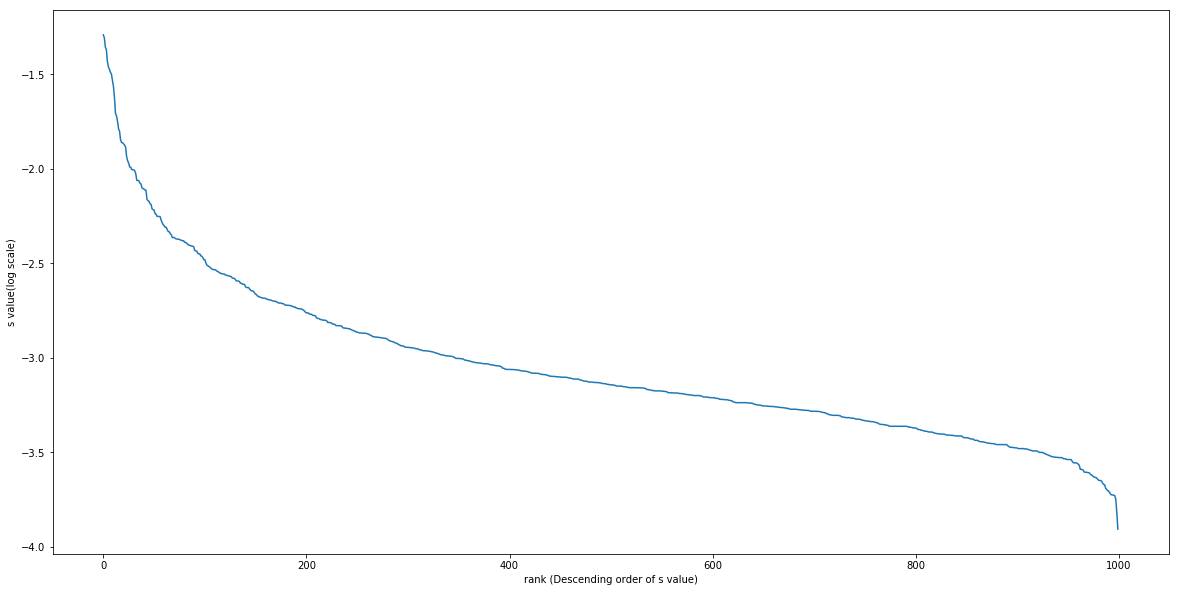

In [70]:
#take a log
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(log_list, reverse=True))

plt.ylabel('s value(log scale)')
plt.xlabel('rank (Descending order of s value)')
plt.show()

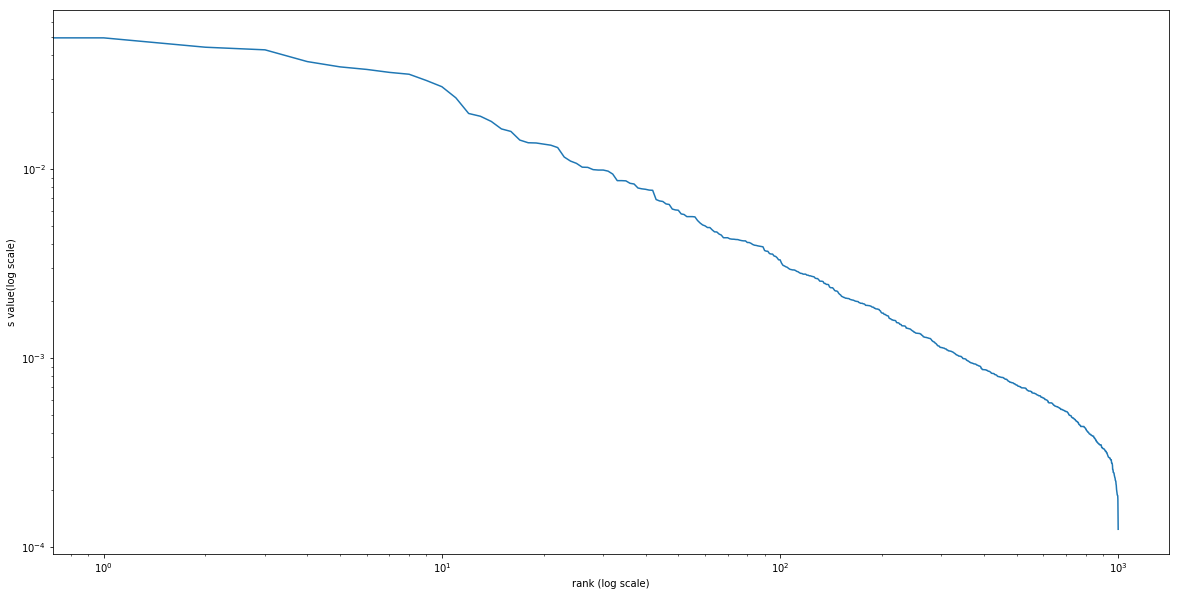

In [71]:
#take a log log graph
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(list1, reverse=True))
plt.xscale("log")
plt.yscale("log")
plt.ylabel('s value(log scale)')
plt.xlabel('rank (log scale)')
plt.show()

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


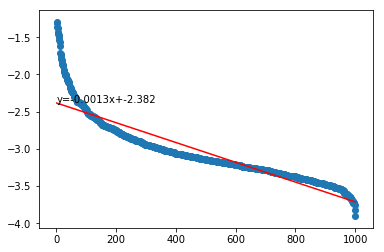

In [72]:
#take a log
import matplotlib.pyplot as plt
import numpy as np

x = range(1, len(log_list)+1)
y = sorted(log_list, reverse=True)


plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
a, b = np.polyfit(x, y, deg=1)
#fit = np.polyfit(x, y, deg=1)
# フィッティング直線
y2 = a * x + b

ax.plot(x, y2, color='red')
ax.text(0.1,a*0.1+b, 'y='+ str(round(a,4)) +'x+'+str(round(b,4)))
ax.scatter(x, y)
#plt.figure(figsize=(20,10))
#plt.plot(x, y)

#plt.ylabel('s value')
#plt.xlabel('words (Descending order of s value)')
#plt.show()

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


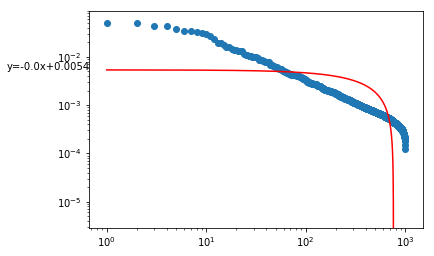

In [73]:
#take a log log graph
import matplotlib.pyplot as plt
import numpy as np

x = range(1, len(list1)+1)
y = sorted(list1, reverse=True)


plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
a, b = np.polyfit(x, y, deg=1)
#fit = np.polyfit(x, y, deg=1)
# フィッティング直線
y2 = a * x + b

ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(x, y2, color='red')
ax.text(0.1,a*0.1+b, 'y='+ str(round(a,4)) +'x+'+str(round(b,4)))
ax.scatter(x, y)


In [74]:
# i,j count
import numpy as np

len(word_f)

5415

In [75]:
np.arange(1,len(word_f)+1, 1)
np.arange(len(word_f), 0, -1)

array([5415, 5414, 5413, ...,    3,    2,    1])

In [76]:
i = np.arange(len(word_f), 0, -1)
j = np.arange(1,len(word_f)+1, 1)

In [77]:
def square(list):
    return [i ** -2 for i in list]
square(i)

[3.4103823976522929e-08,
 3.4116423523465069e-08,
 3.4129030053989738e-08,
 3.4141643573258953e-08,
 3.4154264086439521e-08,
 3.4166891598703023e-08,
 3.4179526115225816e-08,
 3.4192167641189035e-08,
 3.4204816181778619e-08,
 3.4217471742185312e-08,
 3.4230134327604636e-08,
 3.4242803943236935e-08,
 3.4255480594287374e-08,
 3.4268164285965912e-08,
 3.4280855023487355e-08,
 3.429355281207133e-08,
 3.4306257656942292e-08,
 3.431896956332955e-08,
 3.4331688536467238e-08,
 3.4344414581594361e-08,
 3.4357147703954767e-08,
 3.4369887908797163e-08,
 3.4382635201375139e-08,
 3.4395389586947139e-08,
 3.4408151070776503e-08,
 3.4420919658131423e-08,
 3.4433695354285018e-08,
 3.4446478164515275e-08,
 3.4459268094105093e-08,
 3.447206514834226e-08,
 3.4484869332519488e-08,
 3.4497680651934412e-08,
 3.4510499111889558e-08,
 3.4523324717692414e-08,
 3.4536157474655379e-08,
 3.4548997388095795e-08,
 3.4561844463335948e-08,
 3.4574698705703071e-08,
 3.4587560120529344e-08,
 3.4600428713151928e-08,
 3.

In [78]:
meddle = len(square(j)) / 2
meddle

2707.5

In [79]:
meddle = len(square(i)) / 2
meddle

2707.5

In [80]:
square(j)[2707]

1.3636492563202415e-07

In [81]:
square(i)[2707]

1.3636492563202415e-07

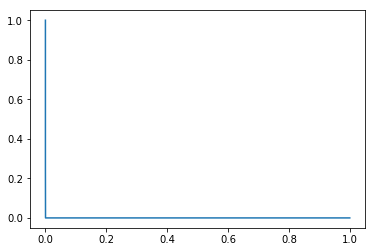

In [82]:
plt.plot(square(i), square(j))

In [83]:
import numpy as np
from scipy import integrate

def computePi(x):
    return (2707**2) / (x)

myu = integrate.quad(computePi, 1, 2707**2)

In [84]:
# 結果にはintegrated value and estimation error
myu

(115832720.33450775, 0.00405778702280557)

In [85]:
(2707**2) * log(2707**2)

115832720.33450773

# just try square

In [87]:
import numpy as np
from scipy import integrate

def computePi(x):
    return (1.3636492563202415e-07**2) / (x)

myu = integrate.quad(computePi, 1, (1.3636492563202415e-07**2))

In [88]:
myu

(-1.563087078650155e-13, 1.738773443706648e-13)

In [89]:
p_values

[0.5647668393782384,
 0.2801500804002144,
 0.020234674329501913,
 0.023528033401499664,
 0.01586673699015471,
 0.01066350710900474,
 0.00979598445595855,
 0.01780572493224932,
 0.008061305732484076,
 0.0073315503003003,
 0.012330334595959596,
 0.17236624379481522,
 0.007936507936507936,
 0.008771929824561403,
 0.0247891203305216,
 0.021778584392014518,
 0.018519815151939505,
 0.05058328552304456,
 0.008574263038548753,
 0.00988562091503268,
 0.04542042042042042,
 0.00900735294117647,
 0.010521885521885523,
 0.011574074074074073,
 0.0057498725790010195,
 0.18861024033437826,
 0.10605170387779084,
 0.008272058823529412,
 0.011968085106382979,
 0.007956191832625298,
 0.01743622860833064,
 0.005902777777777778,
 0.008092517921146953,
 0.005902777777777778,
 0.006432514245014244,
 0.010452835648148149,
 0.021622026036211283,
 0.008714596949891068,
 0.004314994606256741,
 0.006944444444444444,
 0.00535475234270415,
 0.006349206349206349,
 0.006172839506172839,
 0.011554953735048522,
 0.01177

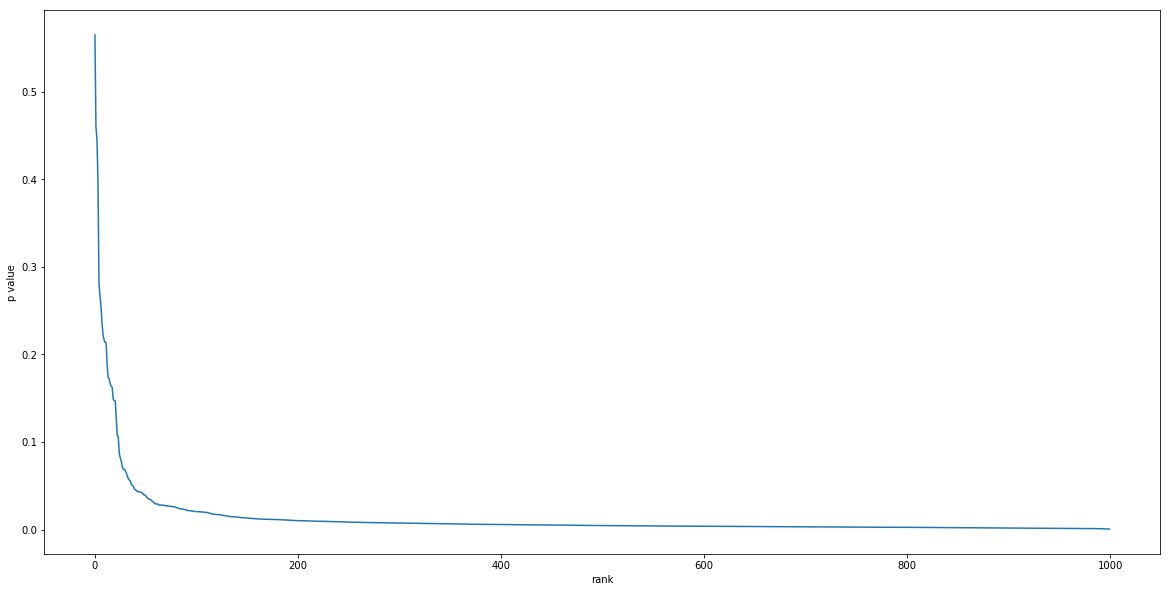

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(p_values, reverse=True))

plt.ylabel('p value')
plt.xlabel('rank')
plt.show()